In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.colorbrewer.qualitative import Set3_12 as color_palette
from palettable.cmocean.sequential import Ice_20 as palette
import scipy

In [24]:
df = pd.read_csv('~/Desktop/tracked/mixing_proportions.txt', sep='\t', header=0, index_col=0)
df.fillna(0, inplace=True)
sns_df = (df*100).round(2)
sns_df.rename(columns={'extreme high temperature habitat':'extreme temperature'}, inplace=True)
sns_df

,Oil palm plantation,agricultural feature,agricultural soil,alluvial paddy field soil,animal-associated habitat,basin,bog,clay soil,coffee plantation,cultivated habitat,...,podzol,shrubland,steppe soil,surface soil,taiga,tropical soil,tundra,volcano,wetland,Unknown
#SampleID,,,,,,,,,,,,,,,,,,,,,
515rcbc8,4.12,1.28,5.17,0.60,0.14,0.54,0.19,0.58,0.84,0.42,...,0.38,0.71,0.39,0.22,1.61,0.73,2.71,1.28,2.89,45.83
515rcbc9,0.16,2.85,4.08,0.44,0.17,0.81,0.30,1.02,2.87,1.78,...,0.12,0.60,0.31,0.21,0.26,0.06,2.63,0.20,1.24,55.72
515rcbc10,0.42,1.25,7.23,0.40,0.12,0.68,0.33,0.75,5.27,0.70,...,0.12,0.75,0.12,0.21,0.15,0.03,4.22,0.65,1.26,50.67
515rcbc11,0.63,2.10,4.17,0.31,0.25,0.88,0.53,0.82,1.37,1.16,...,0.20,0.92,0.34,0.27,0.78,0.12,2.56,0.50,1.83,49.18
515rcbc12,0.52,1.65,7.72,0.35,0.05,0.29,0.16,0.39,2.52,0.29,...,0.27,1.72,0.18,0.33,0.08,0.04,5.23,0.30,0.71,46.21
515rcbc13,0.39,4.56,7.91,0.40,0.22,0.37,0.15,1.18,4.92,0.90,...,0.04,1.24,0.18,0.12,0.08,0.04,2.45,0.15,2.02,48.52
515rcbc14,0.21,2.42,4.66,0.26,0.02,0.51,0.29,0.48,3.44,0.60,...,0.08,1.56,0.15,0.20,0.15,0.08,1.91,0.12,0.73,45.15
515rcbc15,0.34,3.29,3.57,0.38,0.76,0.53,0.89,0.70,6.15,2.03,...,0.16,1.44,0.16,0.08,0.09,0.02,2.84,0.39,0.40,54.78
515rcbc16,0.78,1.60,3.74,0.58,0.40,0.65,0.25,1.43,2.43,0.96,...,0.30,0.67,0.52,0.14,0.62,0.47,4.05,0.50,2.36,41.69


In [25]:
df_std = pd.read_csv('~/Desktop/tracked/mixing_proportions_stds.txt', sep='\t', header=0, index_col=0)
df_std.fillna(0, inplace=True)

In [31]:
def plot_heatmap(dataframe, title=False, savename=False,):
    matplotlib.rcParams.update({'font.size': 36})
    fig, ax = plt.subplots(figsize=(30,40), dpi=50)
    sns.heatmap(ax=ax, data=dataframe.drop('Unknown', axis=1).T, cbar_kws=dict(use_gridspec=False,location="top", shrink=1))
    
    if savename:
        plt.savefig(savename, bbox_inches='tight')
    plt.show()

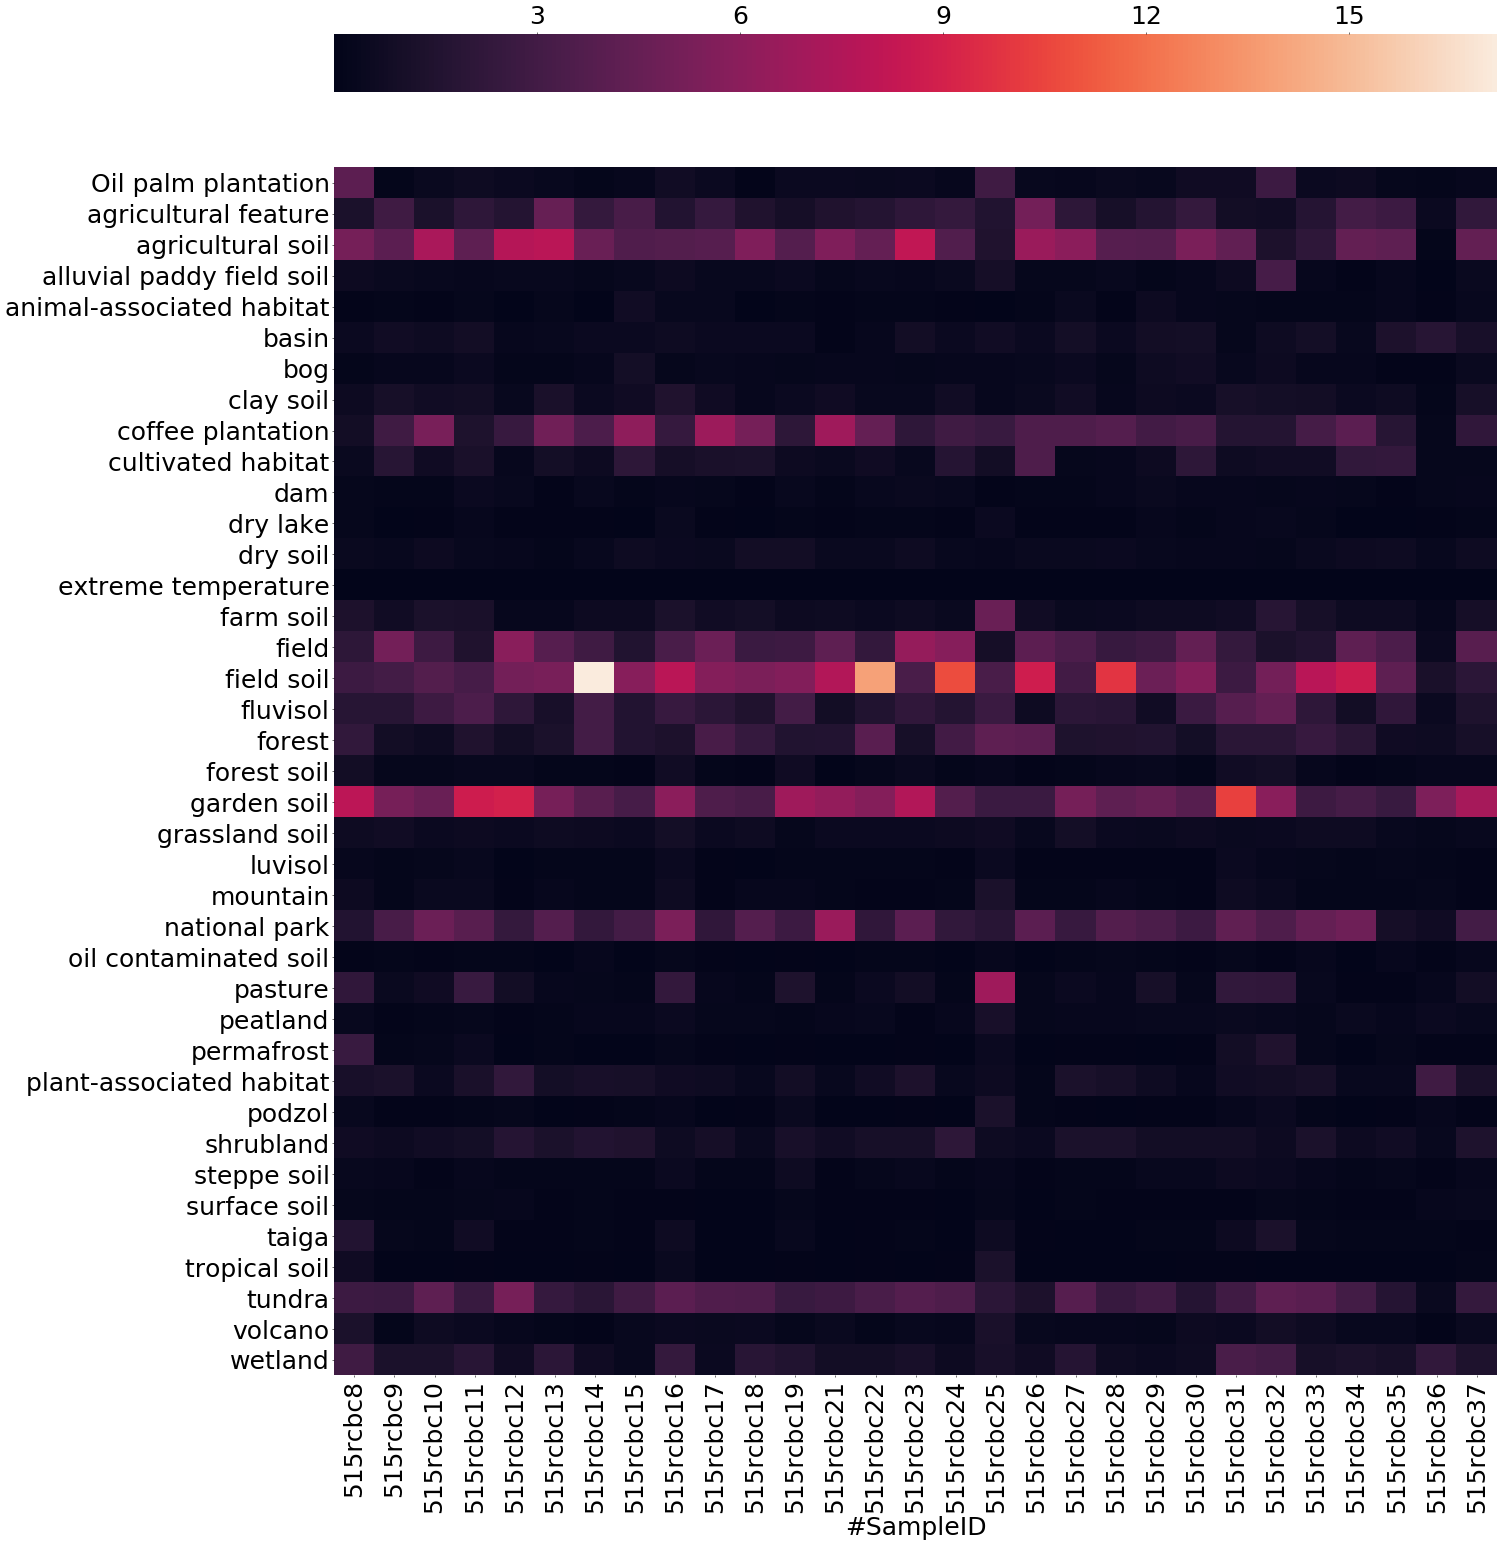

In [32]:
plot_heatmap(sns_df,
            savename='heatmap_extended.png')

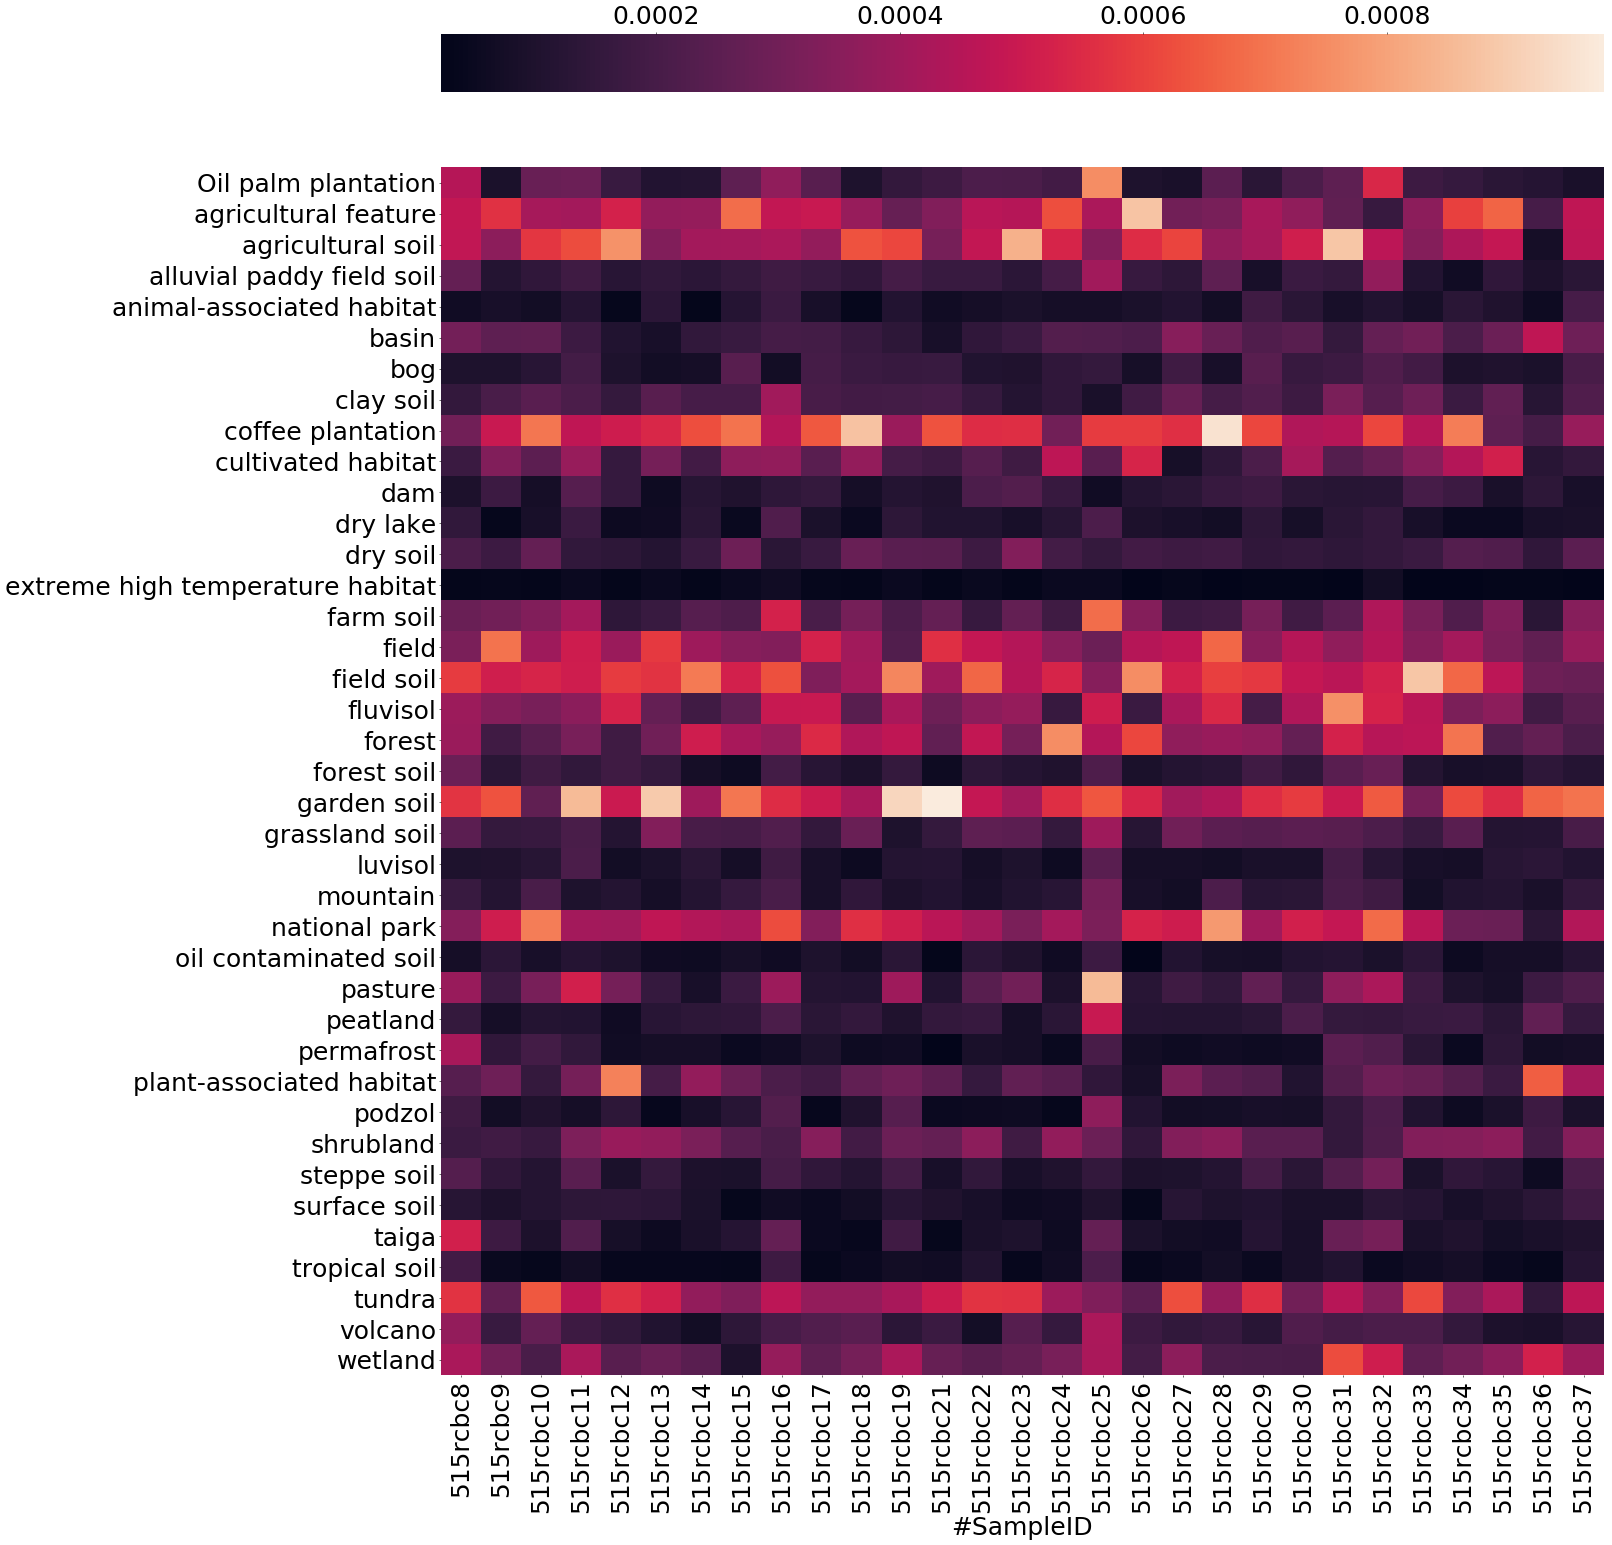

In [33]:
plot_heatmap(df_std, 
             title='Standard deviation of mean fractional contribution of each source in sample\n', 
             savename='heatmap_std.png')

In [34]:
def plot_pie_sample(sample, dataframe):
    colors = color_palette.hex_colors

#     crunch the numbers
    
    ser = dataframe.loc[sample]
    ser.sort_values(inplace=True, ascending=False)
    ser.drop(ser.index[11:], inplace=True)
    new = pd.Series(1-ser.sum(), index=['else'])
    ser = ser.append(new)
    
#     plot the graph
    
    matplotlib.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    sources = ser.index
    proportions = ser.values
    w,l,p = ax.pie(proportions, startangle=90, colors=colors, autopct='%1.1f%%',
          pctdistance=1.1, labeldistance=1.3);
    ax.legend(labels=sources, loc='lower left')
    [t.set_rotation(40) for t in p]
    plt.title("Sourcetracker results for sample " + sample)
    plt.savefig('./pie_charts/' + sample + '.png', bbox_inches='tight')
    plt.show()

In [18]:
!mkdir pie_charts

mkdir: pie_charts: File exists


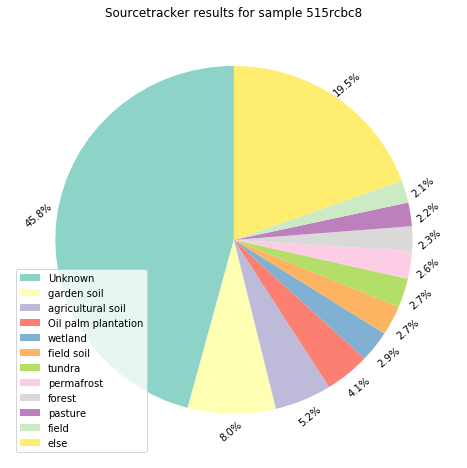

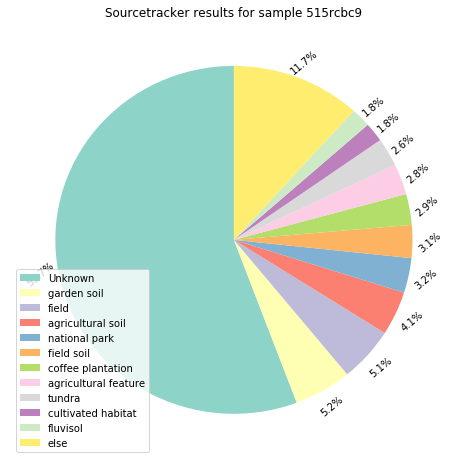

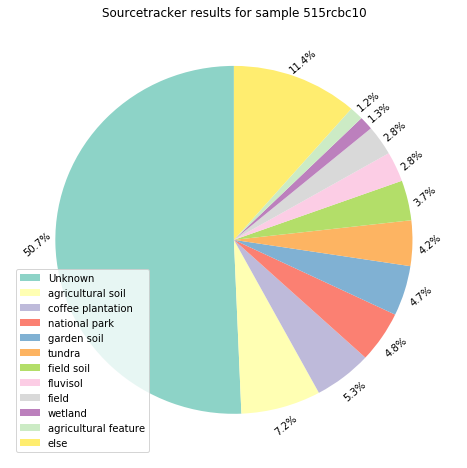

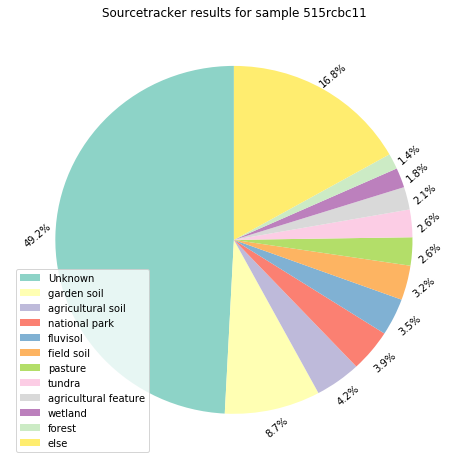

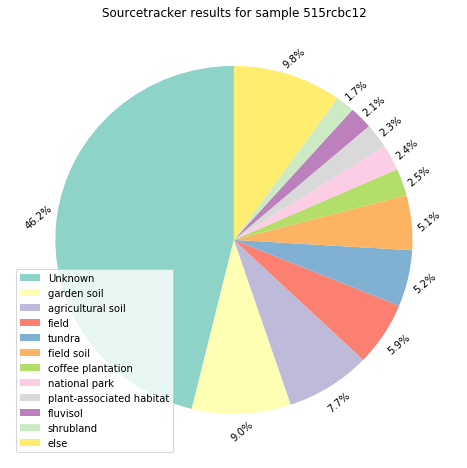

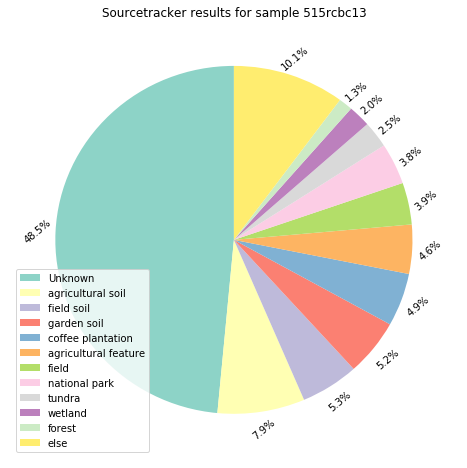

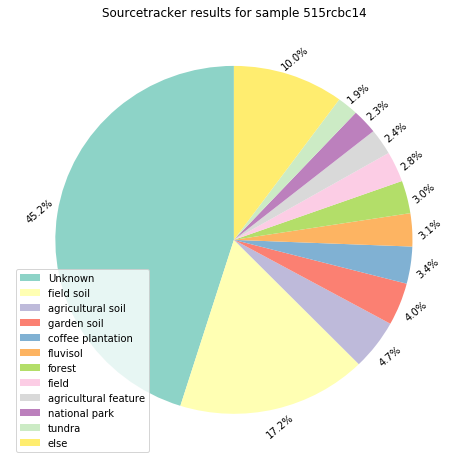

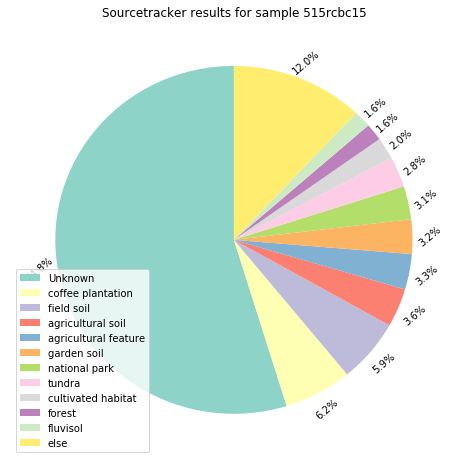

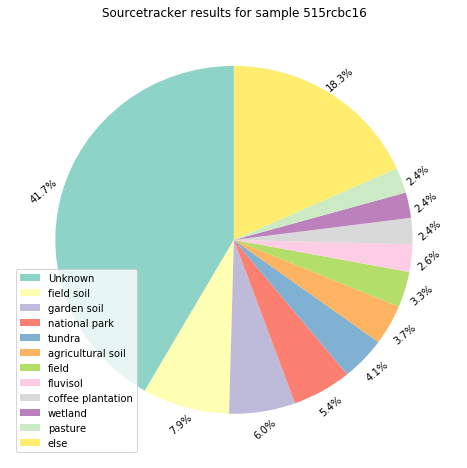

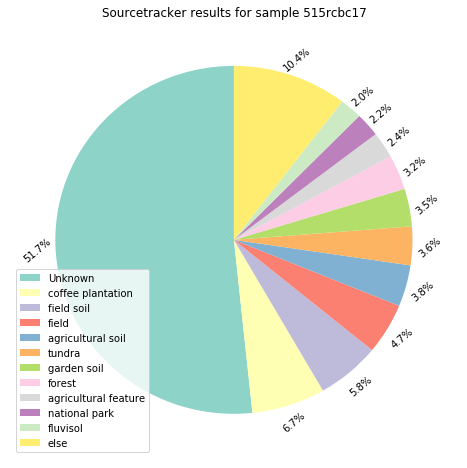

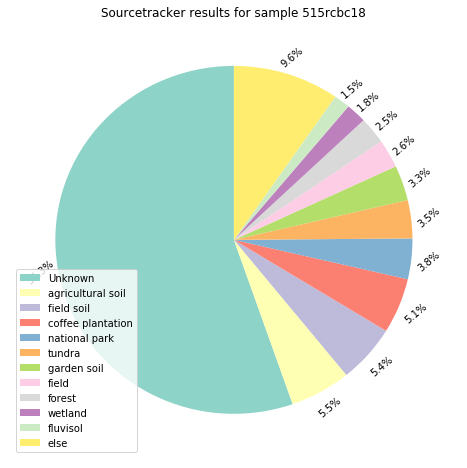

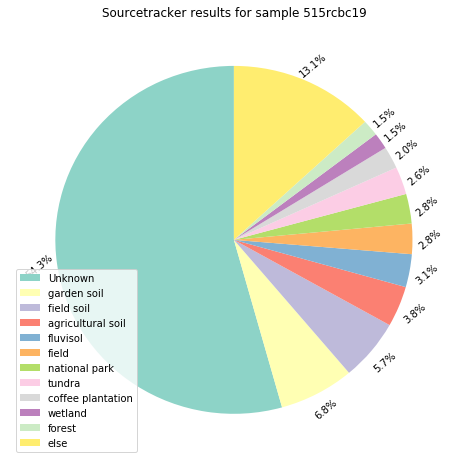

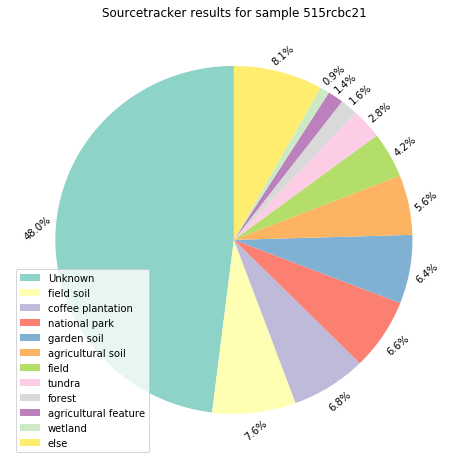

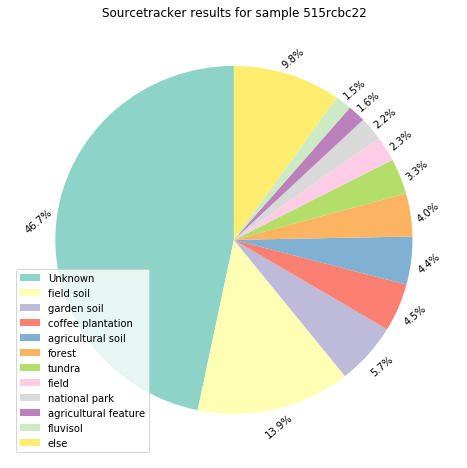

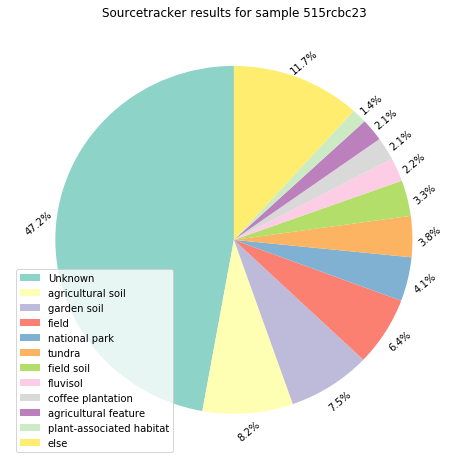

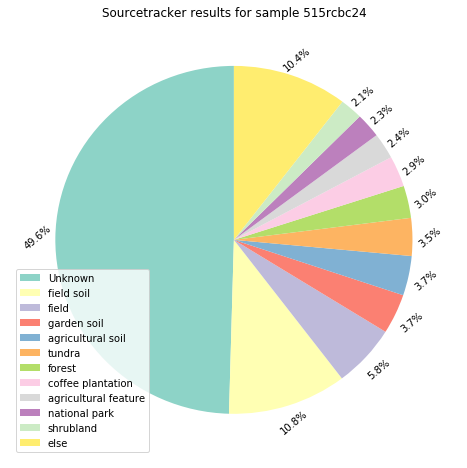

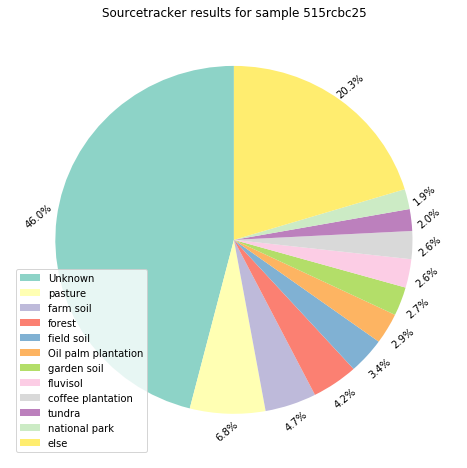

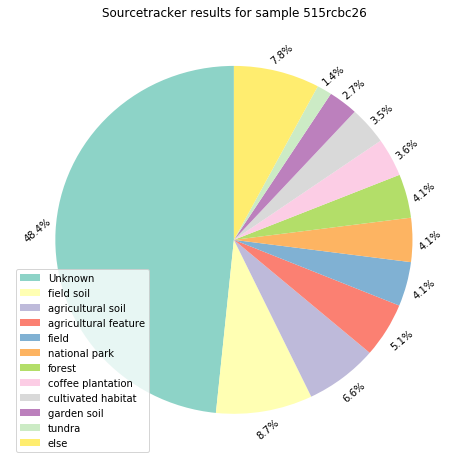

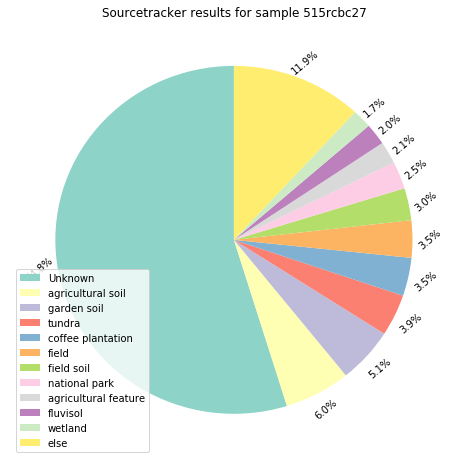

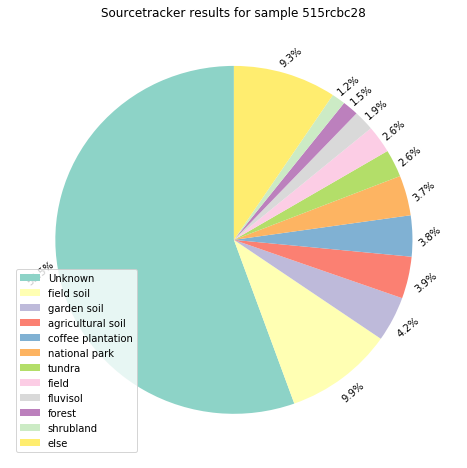

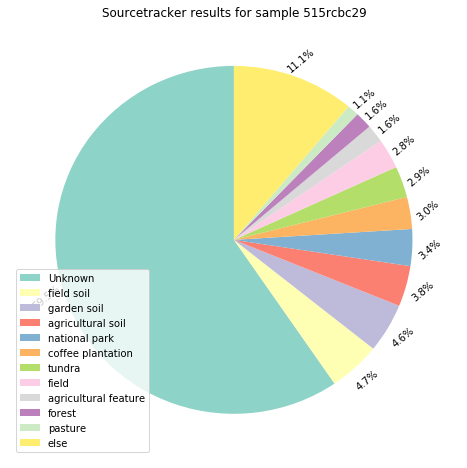

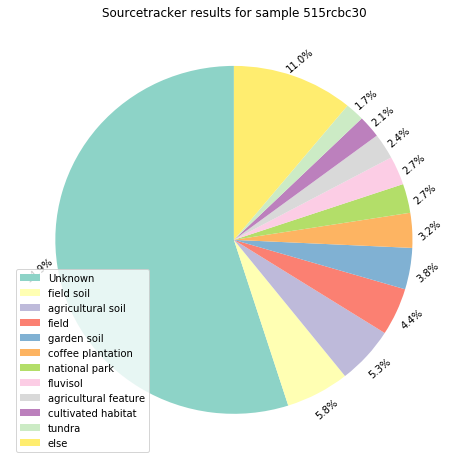

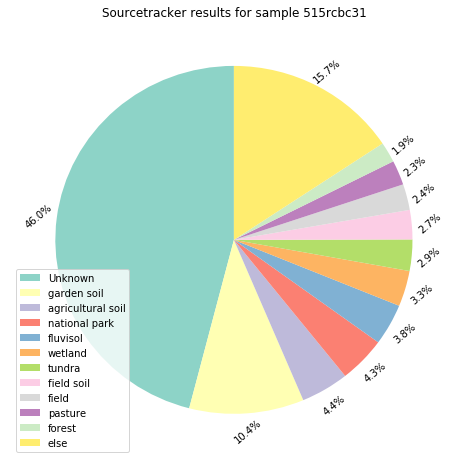

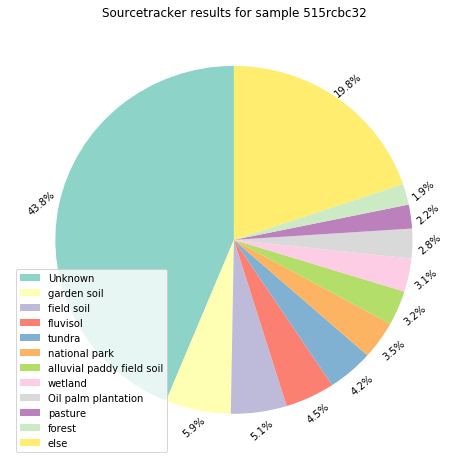

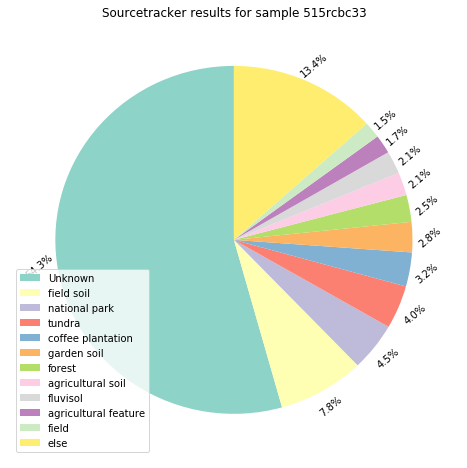

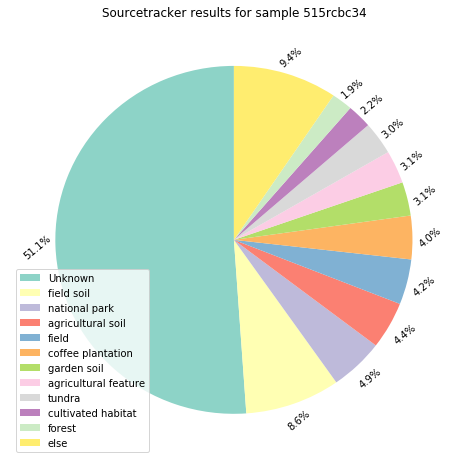

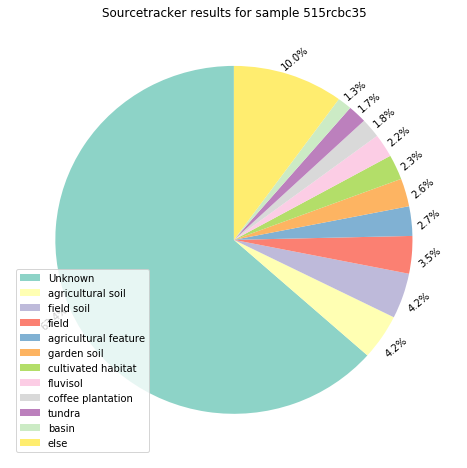

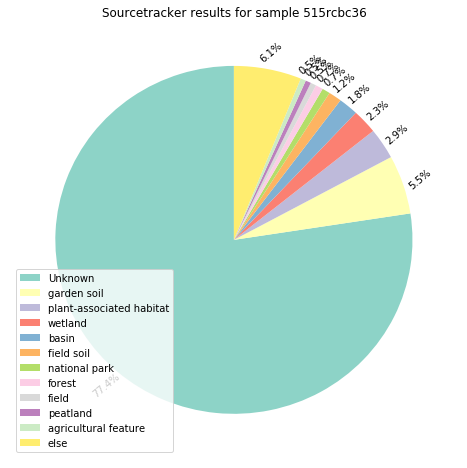

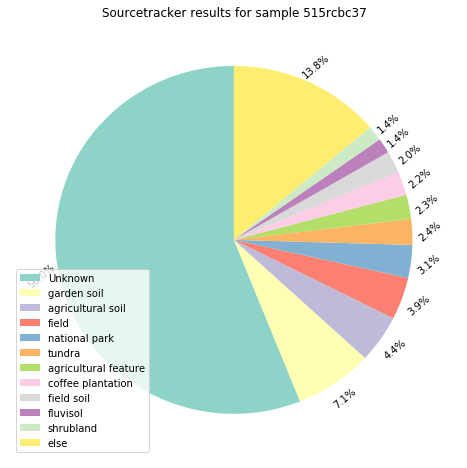

In [19]:
for samp in df.index:
    plot_pie_sample(samp, df)